Для наших задач создадим датасет, в котором будет три кластера, а у каждого объекта будет два признака.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

Визуализируем наш датасет:

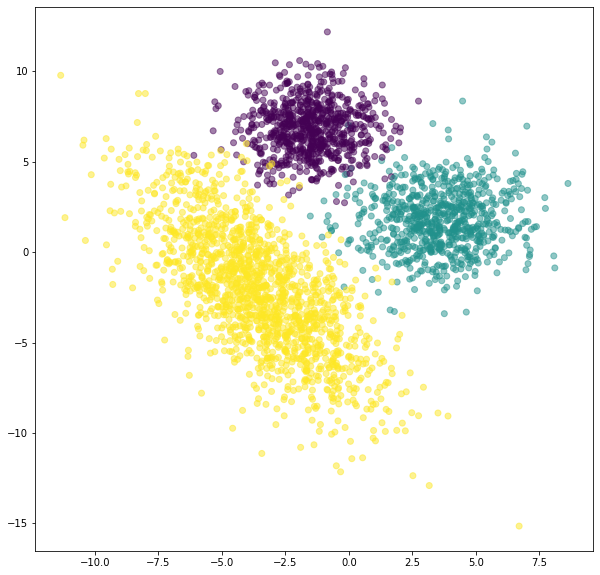

In [2]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

Посмотрим распределение классов в датасете:

In [3]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))
{0: 750, 1: 750, 2: 1500}

{0: 750, 1: 750, 2: 1500}

Объект, который выполняет кластеризацию датасета с помощью алгоритма K-means, инициализруется так:

In [25]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, init='random')

Для обучения модели K-means необходимо вызвать метод fit, передав входным параметром признаки объектов датасета:

In [26]:
k_means.fit(X)

KMeans(init='random', n_clusters=3)

Обучив, мы можем получить центроиды кластеров:

In [27]:
k_means.cluster_centers_

array([[-2.36331742,  6.25172444],
       [ 3.6296089 ,  1.74479425],
       [-3.20186043, -2.8897968 ]])

И узнать, в какой кластер попал каждый из объектов:

In [28]:
print(np.round(k_means.cluster_centers_).astype(np.int))

[[-2  6]
 [ 4  2]
 [-3 -3]]


<ipython-input-28-eecebf80d3f7>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(np.round(k_means.cluster_centers_).astype(np.int))


In [29]:
labels = k_means.labels_

In [30]:
_, counts = np.unique(labels, return_counts=True)

In [31]:
for count in counts:
    print(count, ' ')

935  
742  
1323  


Для визуализации получившегося датасета можно использовать следующий код:

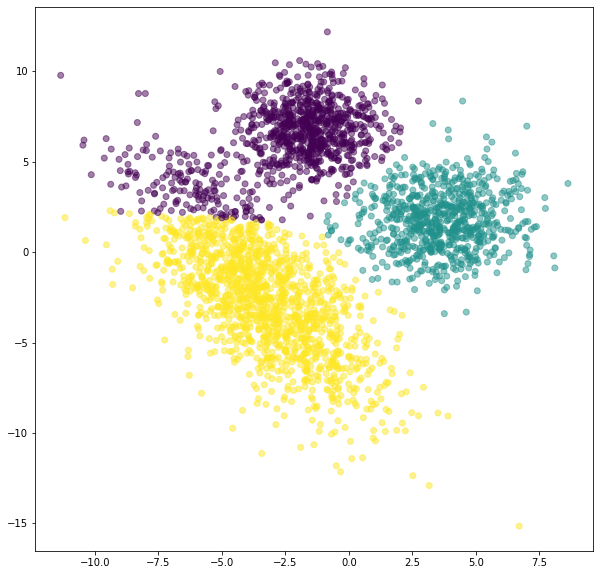

In [32]:
k_means_pred = k_means.labels_

plt.scatter(X[:, 0], X[:, 1], c=k_means_pred, alpha=0.5)
plt.show()

In [69]:
import pandas as pd

In [70]:
data = pd.read_csv('data/snsdata.csv')

In [71]:
data.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [72]:
df = data.drop(['gradyear', 'gender', 'age', 'friends'], axis=1)

In [73]:
df.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler().fit(df)

In [76]:
X = scaler.transform(df)

In [77]:
kmean = KMeans(n_clusters=9, random_state=123)

In [78]:
kmean.fit(X)

KMeans(n_clusters=9, random_state=123)

In [79]:
df['cluster_label'] = kmean.labels_

In [80]:
df.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster_label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,6


In [65]:
claster, counts = np.unique(kmean.labels_, return_counts=True)

In [66]:
list(zip(claster, counts))

[(0, 5036),
 (1, 1337),
 (2, 752),
 (3, 697),
 (4, 20024),
 (5, 1),
 (6, 846),
 (7, 466),
 (8, 841)]

In [53]:
print(result)

In [56]:
kmean.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 9,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': 123,
 'tol': 0.0001,
 'verbose': 0}

In [58]:
kmean.score(X)

-861745.6454157995

In [81]:
for k, group in df.groupby('cluster_label'):
    print(k)
    top_words = group.iloc[:,:-1].mean()\
                 .sort_values(ascending=False)\
                 .head(10)
    print(top_words)

0
music         1.066521
dance         1.051033
shopping      0.890191
cute          0.828435
basketball    0.722597
hair          0.691223
mall          0.652502
football      0.617752
god           0.573272
church        0.496426
dtype: float64
1
drunk       1.409873
music       0.707554
hair        0.629020
god         0.522064
dance       0.439043
cute        0.384443
sex         0.380703
shopping    0.326103
mall        0.287210
die         0.275991
dtype: float64
2
band        4.105053
marching    1.418883
music       1.215426
god         0.505319
dance       0.464096
hair        0.371011
rock        0.344415
shopping    0.289894
football    0.275266
cute        0.275266
dtype: float64
3
soccer        4.901004
music         0.773314
shopping      0.499283
god           0.469154
hair          0.440459
basketball    0.428981
dance         0.398852
football      0.397418
cute          0.337159
church        0.321377
dtype: float64
4
music       0.554035
god         0.311626
dance   